In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
# Custom Linear Regression Class
class Linear_Regression():
    def __init__(self, learning_rate=0.01, no_of_iterations=1000):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        
    def fit(self, X, Y):
        self.m , self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        self.cost_history = []  # To store cost values
        
        # Gradient Descent
        for i in range(self.no_of_iterations):
            self.update_weight()
            cost = self.compute_cost()
            self.cost_history.append(cost)  # Track cost reduction
        
    def update_weight(self):
        Y_prediction = self.predict(self.X)
        dw = -(2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = - 2 * np.sum(self.Y - Y_prediction) / self.m
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
        
    def predict(self, X):
        return X.dot(self.w) + self.b
    
    def compute_cost(self):
        Y_prediction = self.predict(self.X)
        return np.mean((self.Y - Y_prediction) ** 2)

In [3]:
df = pd.read_csv("salary_data.csv")

In [4]:
df.sample(5)

,YearsExperience,Salary
1,1.3,46205
11,4.0,55794
14,4.5,61111
22,7.9,101302
15,4.9,67938


In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [9]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, -1].values

In [11]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [12]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [14]:
# Training Custom Model
model = Linear_Regression(learning_rate=0.01, no_of_iterations=1000)
model.fit(X_train, Y_train)


In [15]:
print("weight = ", model.w[0])
print("bias = ", model.b)

weight =  9457.85255556112
bias =  25092.06190300327


In [16]:
# Predictions
Y_pred_custom = model.predict(X_test)
Y_pred_custom

array([115887.44643639,  71435.53942525, 102646.4528586 ,  75218.68044748,
        55357.1900808 ,  60086.11635858])

In [17]:
# Evaluate Model
mse_custom = mean_squared_error(Y_test, Y_pred_custom)
r2_custom = r2_score(Y_test, Y_pred_custom)

print(f"Custom Linear Regression - MSE: {mse_custom}, R²: {r2_custom}")


Custom Linear Regression - MSE: 50064732.56031778, R²: 0.9019868243097158


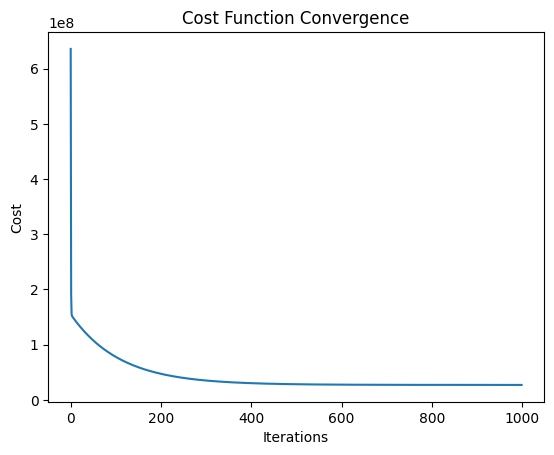

In [18]:
# Plot Cost Function Convergence
plt.plot(model.cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

In [19]:
# Comparison with Scikit-Learn Model
sk_model = LinearRegression()
sk_model.fit(X_train, Y_train)
Y_pred_sklearn = sk_model.predict(X_test)

In [20]:
mse_sklearn = mean_squared_error(Y_test, Y_pred_sklearn)
r2_sklearn = r2_score(Y_test, Y_pred_sklearn)

print(f"Scikit-Learn Linear Regression - MSE: {mse_sklearn}, R²: {r2_sklearn}")


Scikit-Learn Linear Regression - MSE: 49830096.85590839, R²: 0.9024461774180497


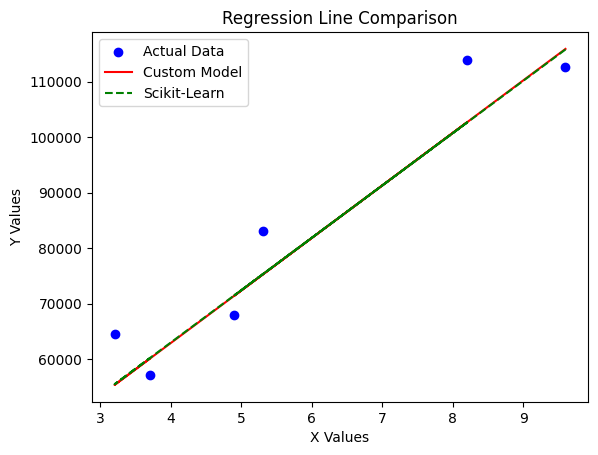

In [21]:
# Plot Regression Line
plt.scatter(X_test, Y_test, color="blue", label="Actual Data")
plt.plot(X_test, Y_pred_custom, color="red", label="Custom Model")
plt.plot(X_test, Y_pred_sklearn, color="green", linestyle="dashed", label="Scikit-Learn")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Regression Line Comparison")
plt.legend()
plt.show()

----

In [22]:
# Compare Performance of Custom Model vs. Scikit-Learn Model
def compare_models(mse_custom, mse_sklearn, r2_custom, r2_sklearn):
    print("\n🔹🔹🔹 Model Performance Comparison 🔹🔹🔹\n")

    # Compare MSE
    print(f"▶ Mean Squared Error (MSE):")
    print(f"   - Custom Model: {mse_custom:.4f}")
    print(f"   - Scikit-Learn Model: {mse_sklearn:.4f}")
    
    if mse_custom > mse_sklearn:
        print("   🔴 Scikit-Learn performs better with lower error.")
    elif mse_custom < mse_sklearn:
        print("   🟢 Custom model has lower error, performing well!")
    else:
        print("   🔵 Both models have the same MSE.")

    print("\n▶ R² Score:")
    print(f"   - Custom Model: {r2_custom:.4f}")
    print(f"   - Scikit-Learn Model: {r2_sklearn:.4f}")
    
    # Compare R² Score
    if r2_custom > r2_sklearn:
        print("   🟢 Custom model explains more variance (possible overfitting).")
    elif r2_custom < r2_sklearn:
        print("   🔴 Scikit-Learn fits the data better.")
    else:
        print("   🔵 Both models perform equally well.")

    print("\n🔹 Conclusion:")
    if mse_custom > mse_sklearn and r2_custom < r2_sklearn:
        print("   🔴 The Scikit-Learn model is more optimized and fits better.")
    elif mse_custom < mse_sklearn and r2_custom > r2_sklearn:
        print("   🟢 The custom model is working well and may even be better!")
    else:
        print("   🔵 Both models perform similarly. Custom implementation is correct.")

# Call the function with actual results
compare_models(mse_custom, mse_sklearn, r2_custom, r2_sklearn)



🔹🔹🔹 Model Performance Comparison 🔹🔹🔹

▶ Mean Squared Error (MSE):
   - Custom Model: 50064732.5603
   - Scikit-Learn Model: 49830096.8559
   🔴 Scikit-Learn performs better with lower error.

▶ R² Score:
   - Custom Model: 0.9020
   - Scikit-Learn Model: 0.9024
   🔴 Scikit-Learn fits the data better.

🔹 Conclusion:
   🔴 The Scikit-Learn model is more optimized and fits better.


----

💡 ***Insight***: Since both models have an R² score above 0.90, they explain most of the variance in the data. The small difference suggests that both models are highly effective, with the Scikit-Learn model being slightly more optimized.



🔹 ***Conclusion***:
🔴 Scikit-Learn model is more optimized and fits slightly better.
📌 However, the difference is minimal, proving that our custom implementation is correct and effective! 🚀